<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [36]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL

In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment

#### Task 1: Become familiar with the dataset

In [11]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [17]:
boston_df.shape

(506, 14)

In [18]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Task 2: Generate Descriptive Statistics and Visualization

##### For the "Median value of owner-occupied homes" provide a boxplot

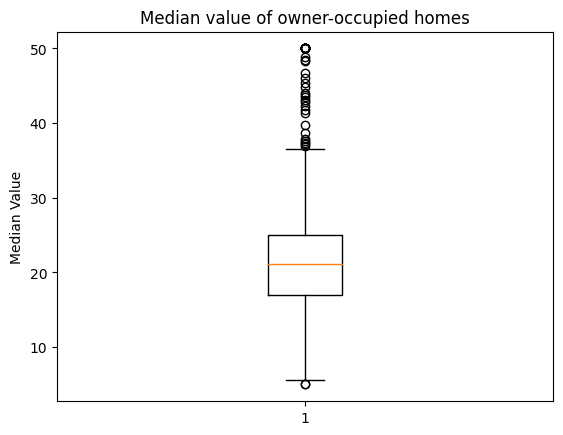

In [23]:
plt.boxplot(boston_df["MEDV"])
plt.title('Median value of owner-occupied homes')
plt.ylabel('Median Value')
plt.show()

##### Provide a  bar plot for the Charles river variable

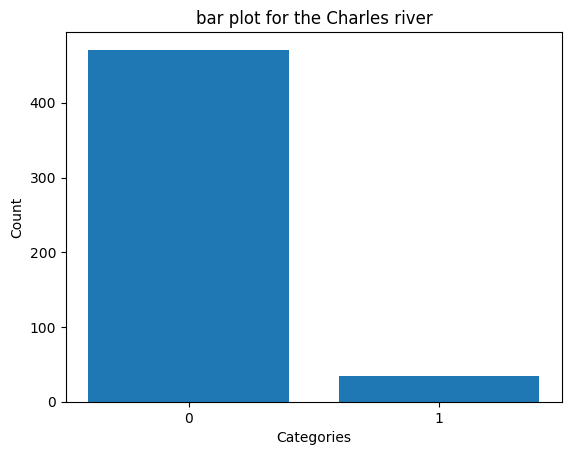

In [28]:
grouped = boston_df.groupby('CHAS').size().reset_index(name='COUNT')

plt.bar(grouped["CHAS"], grouped["COUNT"])
plt.title('bar plot for the Charles river')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(grouped["CHAS"])
plt.show()

#### boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [29]:
def age_group(age):
    if age <= 35:
        return '35 years and younger'
    elif 35 < age < 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

boston_df['AgeGroup'] = boston_df['AGE'].apply(age_group)

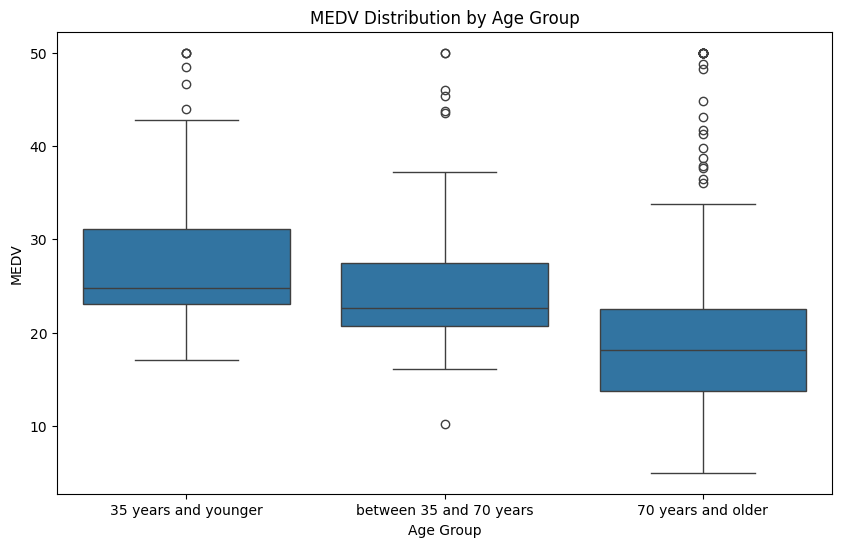

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='MEDV', data=boston_df, order=['35 years and younger','between 35 and 70 years','70 years and older'])
plt.title('MEDV Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

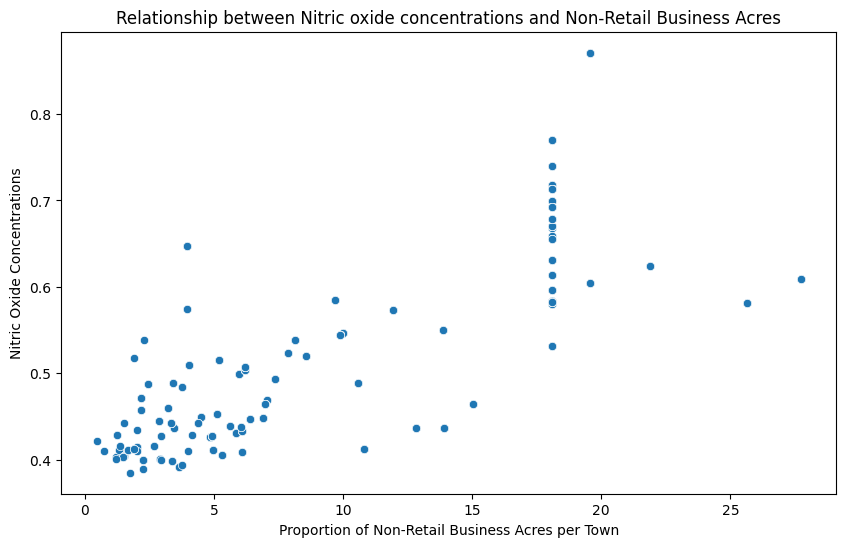

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.show()

##### General trend of increasing Nitric oxide concentrations as the proportion of non-retail business acres per town increases, it suggests a positive relationship between the two variables

#### Create a histogram for the pupil to teacher ratio variable

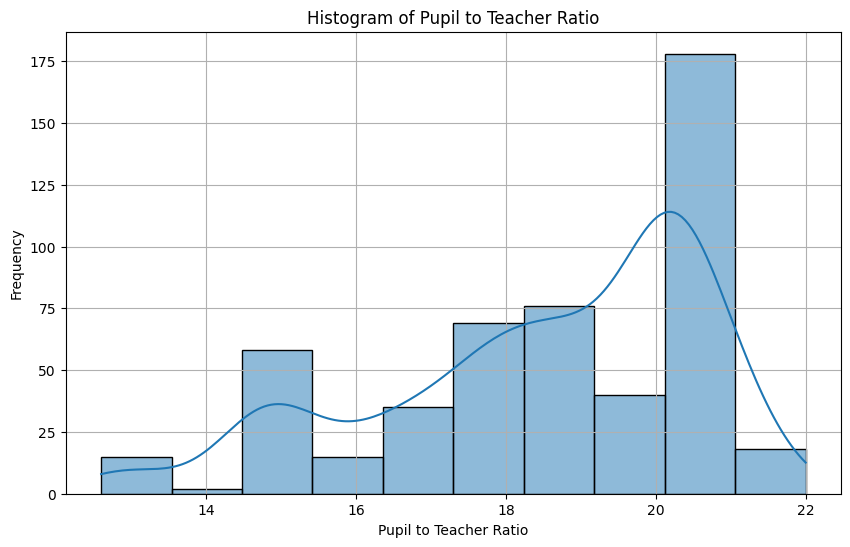

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Task 3: Use the appropriate tests to answer the questions provided.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [38]:
# NULL HYPOTHESIS - MEANS ARE SAME FOR BOTH SAMPLES
# ALTERNATE HYPOTHESIS - MEANS ARE DIFFERENT FOR BOTH SAMPLES

group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(group1, group2)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# As alpha = 0.05 and p value is less than 0.05, we reject the null hypothesis,
# hence there is a significant difference between the both samples meams

T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [41]:
# NULL HYPOTHESIS - MEANS ARE SAME FOR ALL SAMPLES
# ALTERNATE HYPOTHESIS - MEANS ARE DIFFERENT FOR ALL SAMPLES

group1 = boston_df[boston_df['AGE'] < 50]['MEDV'] 
group2 = boston_df[(boston_df['AGE'] >= 50) & (boston_df['AGE'] < 75)]['MEDV'] 
group3 = boston_df[boston_df['AGE'] >= 75]['MEDV'] 


f_statistic, p_value = stats.f_oneway(group1, group2, group3)
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# AS alpha = 0.05 and p value is less than 0.05 we can say 
# There is a significant difference in the median values of houses for 
# each proportion of owner-occupied units built prior to 1940.

F-Statistic: 37.784436401721976
P-Value: 5.152873204096215e-16


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [43]:
pearson_corr = boston_df['NOX'].corr(boston_df['INDUS'], method='pearson')

print("Pearson Correlation Coefficient:", pearson_corr)

# There is a positive linear relationship between Nitric oxide concentrations 
# and the proportion of non-retail business acres per town

Pearson Correlation Coefficient: 0.763651446920914


#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [45]:
X = sm.add_constant(boston_df['DIS'])
model = sm.OLS(boston_df['MEDV'], X).fit()
print(model.summary())

# the coefficient is positive, it suggests that as the weighted distance increases, the median value of homes also increases
# p-value associated with the coefficient is 0.0,hence the relationship is statistically significant.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        14:55:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:
# EN